In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def map_ranges(inputValue: float, inMin: float, inMax: float, outMin: float, outMax: float):
    """
    Map a given value from range 1 -> range 2
    :param inputValue: The value you want to map
    :param inMin: Minimum Value of Range 1
    :param inMax: Maximum Value of Range 1
    :param outMin: Minimum Value of Range 2
    :param outMax: Maximum Value of Range 2
    :return: The new Value in Range 2
    """
    slope = (outMax - outMin) / (inMax - inMin)
    return outMin + slope * (inputValue - inMin)

def histogram(data: np.array, bins_num: int = 255):
    """

    :param data:
    :param bins_num:
    :return:
    """
    if bins_num == 2:
        new_data = data
    else:
        new_data = np.round(np.interp(data, (data.min(), data.max()), (0, bins_num))).astype('uint8')
    bins = np.arange(0, bins_num)
    hist = np.bincount(new_data.ravel(), minlength=bins_num)
    return hist, bins

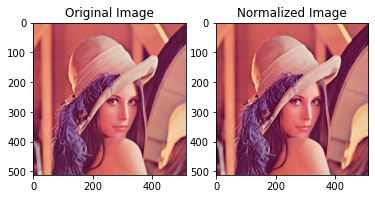

In [21]:
image1_bgr = cv2.imread('src/Images/Lenna_512.png')
image1_rgb = cv2.cvtColor(image1_bgr, cv2.COLOR_BGR2RGB)
image1_gray = cv2.cvtColor(image1_bgr, cv2.COLOR_BGR2GRAY)
image1_size = image1_rgb.shape[0] * image1_rgb.shape[1]

image2_bgr = cv2.imread('src/Images/hand_256.png')
image2_rgb = cv2.cvtColor(image2_bgr, cv2.COLOR_BGR2GRAY)

norm_img = np.zeros((image1_rgb.shape[0], image1_rgb.shape[1]))
final_img = cv2.normalize(image1_rgb,  norm_img, 0, 255, cv2.NORM_MINMAX)

# show original image
plt.subplot(121)
plt.imshow(image1_rgb)
plt.title('Original Image')
plt.set_cmap('gray')

# show Normalized image
plt.subplot(122)
plt.imshow(final_img)
plt.title('Normalized Image')
plt.set_cmap('gray')
plt.show()

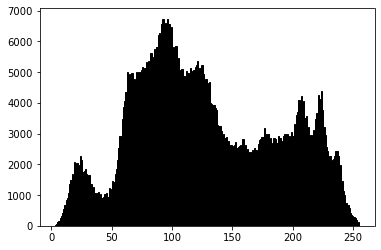

In [22]:
hist, bins = histogram(data=image1_rgb, bins_num=255)
plt.hist(image1_rgb.ravel(), bins=255, fc='k', ec='k')
plt.show()

In [23]:
# Compute the discrete PDF (Probability distribution function)
pr = hist / image1_size

# Compute the discrete CDF (Accumulative Histogram)
acc = []
temp = 0
for i in range(256):
    temp += pr[i]
    acc.append(temp)
    
acc = np.array(acc) * (image1_rgb.shape[0]-1)
sk = np.round(acc)
# print(sk)

In [24]:
# map the pixels values
eq_img = np.zeros((256, 256))
for i in range(256):
    for j in range(256):
        eq_img[i][j] = sk[j]



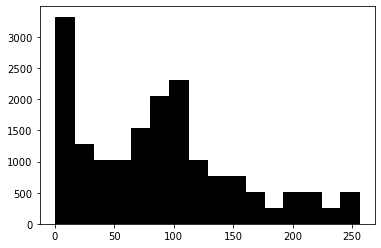

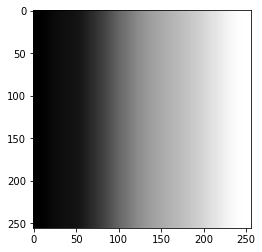

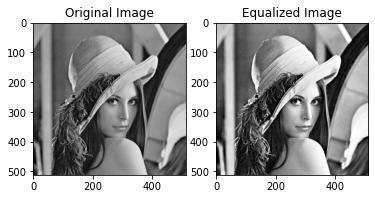

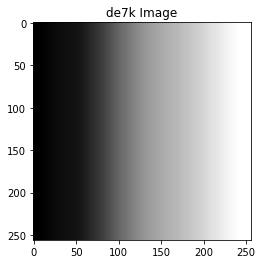

In [35]:
equ = cv2.equalizeHist(image1_gray)

# show original Image
plt.subplot(121)
plt.imshow(image1_gray)
plt.title('Original Image')
plt.set_cmap('gray')

# show Equalized Image
plt.subplot(122)
plt.imshow(equ)
plt.title('Equalized Image')
plt.set_cmap('gray')
plt.show()

# show de7k images
plt.subplot(111)
plt.imshow(eq_img)
plt.title('de7k Image')
plt.set_cmap('gray')
plt.show()

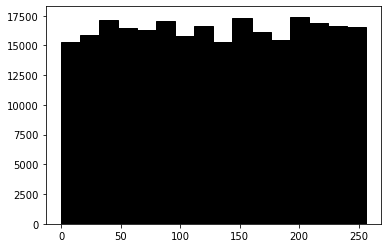

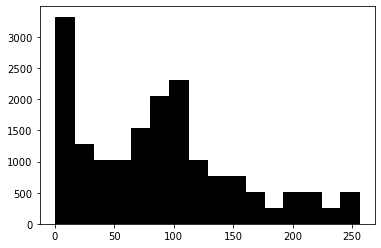

In [38]:
plt.hist(equ.ravel(), bins=16, range=[0, 256], fc='k', ec='k')
plt.show()

plt.hist(eq_img.ravel(), bins=16, range=[0, 256], fc='k', ec='k')
plt.show()

In [39]:
def imhist(im):
  # calculates normalized histogram of an image
	m, n = im.shape
	h = [0.0] * 256
	for i in range(m):
		for j in range(n):
			h[im[i, j]]+=1
	return np.array(h)/(m*n)

def cumsum(h):
	# finds cumulative sum of a numpy array, list
	return [sum(h[:i+1]) for i in range(len(h))]

def histeq(im):
	#calculate Histogram
	h = imhist(im)
	cdf = np.array(cumsum(h)) #cumulative distribution function
	sk = np.uint8(255 * cdf) #finding transfer function values
	s1, s2 = im.shape
	Y = np.zeros_like(im)
	# applying transfered values for each pixels
	for i in range(0, s1):
		for j in range(0, s2):
			Y[i, j] = sk[im[i, j]]
	H = imhist(Y)
	#return transformed image, original and new istogram, 
	# and transform function
	return Y , h, H, sk

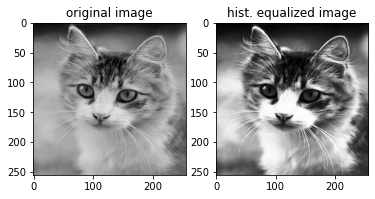

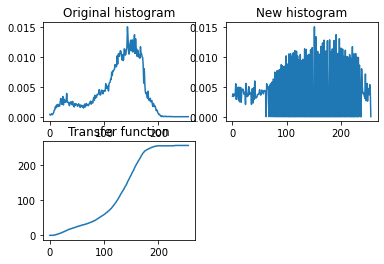

In [40]:
import pylab as plt
import matplotlib.image as mpimg
import numpy as np
# load image to numpy arrayb
# matplotlib 1.3.1 only supports png images
# use scipy or PIL for other formats
img = np.uint8(mpimg.imread('src/Images/cat256.jpg'))
# convert to grayscale
# do for individual channels R, G, B, A for nongrayscale images

img = np.uint8((0.2126* img[:,:,0]) + \
  		np.uint8(0.7152 * img[:,:,1]) +\
			 np.uint8(0.0722 * img[:,:,2]))

# use hist module from hist.py to perform histogram equalization
new_img, h, new_h, sk = histeq(img)

# show old and new image
# show original image
plt.subplot(121)
plt.imshow(img)
plt.title('original image')
plt.set_cmap('gray')
# show original image
plt.subplot(122)
plt.imshow(new_img)
plt.title('hist. equalized image')
plt.set_cmap('gray')
plt.show()

# plot histograms and transfer function
fig = plt.figure()
fig.add_subplot(221)
plt.plot(h)
plt.title('Original histogram') # original histogram

fig.add_subplot(222)
plt.plot(new_h)
plt.title('New histogram') #hist of eqlauized image

fig.add_subplot(223)
plt.plot(sk)
plt.title('Transfer function') #transfer function

plt.show()

In [41]:
def threshold_image(data: np.ndarray, threshold: int, type: str = "global"):
    if type == "global":
        return (data > threshold).astype(int)
    
    elif type == "local":
        pass


def normalize_image(data: np.ndarray, value: int):
    data = data / value
    print('Min: %.3f, Max: %.3f' % (data.min(), data.max()))
    return data

In [42]:
out_threshold = threshold_image(img, 130)
out_threshold

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

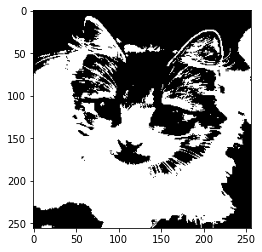

In [43]:
imgplot = plt.imshow(out_threshold, cmap="gray")

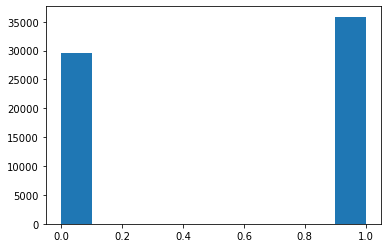

In [44]:
plt.hist(out_threshold.ravel())
plt.show()

In [45]:
print(img.dtype)
out_norm = normalize_image(img, 220)
out_norm
# new_data = np.round(np.interp(out_norm, (out_norm.min(), out_norm.max()), (0, 255))).astype('uint8')

uint8
Min: 0.000, Max: 1.045


array([[0.04090909, 0.04090909, 0.04090909, ..., 0.1       , 0.11363636,
        0.12727273],
       [0.05      , 0.04090909, 0.05      , ..., 0.11363636, 0.12727273,
        0.13636364],
       [0.05909091, 0.05909091, 0.05454545, ..., 0.13181818, 0.14090909,
        0.14545455],
       ...,
       [0.50909091, 0.50454545, 0.51363636, ..., 0.4       , 0.39090909,
        0.39090909],
       [0.51363636, 0.51363636, 0.53181818, ..., 0.39090909, 0.39545455,
        0.39090909],
       [0.52272727, 0.52727273, 0.54090909, ..., 0.39090909, 0.4       ,
        0.39545455]])

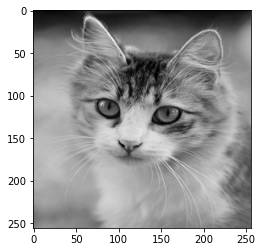

In [46]:
plt.imshow(img, cmap="gray")

[[0.04090909 0.04090909 0.04090909 ... 0.1        0.11363636 0.12727273]
 [0.05       0.04090909 0.05       ... 0.11363636 0.12727273 0.13636364]
 [0.05909091 0.05909091 0.05454545 ... 0.13181818 0.14090909 0.14545455]
 ...
 [0.50909091 0.50454545 0.51363636 ... 0.4        0.39090909 0.39090909]
 [0.51363636 0.51363636 0.53181818 ... 0.39090909 0.39545455 0.39090909]
 [0.52272727 0.52727273 0.54090909 ... 0.39090909 0.4        0.39545455]]


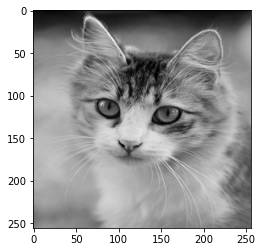

In [47]:
print(out_norm)
plt.imshow(out_norm, cmap="gray")

In [48]:
ar = np.array(img).astype(np.float32)
mn = np.min(ar)
mx = np.max(ar)
norm = (ar - mn) * (1.0 / (mx - mn))
norm

array([[0.03913043, 0.03913043, 0.03913043, ..., 0.09565217, 0.10869565,
        0.12173913],
       [0.04782609, 0.03913043, 0.04782609, ..., 0.10869565, 0.12173913,
        0.13043478],
       [0.05652174, 0.05652174, 0.05217391, ..., 0.12608695, 0.1347826 ,
        0.13913043],
       ...,
       [0.4869565 , 0.48260868, 0.49130434, ..., 0.38260868, 0.37391302,
        0.37391302],
       [0.49130434, 0.49130434, 0.5086956 , ..., 0.37391302, 0.37826085,
        0.37391302],
       [0.49999997, 0.5043478 , 0.51739126, ..., 0.37391302, 0.38260868,
        0.37826085]], dtype=float32)

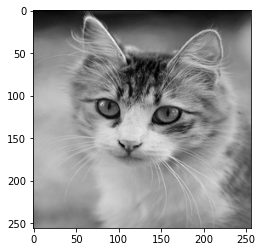

In [49]:
plt.imshow(norm, cmap="gray")

In [50]:
# techniques on the input image
thresh1 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                          cv2.THRESH_BINARY, 199, 5)
  
thresh2 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY, 199, 5)

# show original image
plt.subplot(121)
plt.imshow(thresh1)
plt.title('thresh1')
plt.set_cmap('gray')

# show original image
plt.subplot(122)
plt.imshow(thresh2)
plt.title('thresh2')
plt.set_cmap('gray')
plt.show()

NameError: name 'img2' is not defined

# RGB TO GRAY

In [51]:
def rgb_to_gray(data: np.ndarray):
#     gray_img = np.zeros((data.shape[0], data.shape[1]))
    
    return np.dot(data[..., :3], [0.299, 0.587, 0.114])
        
#     for i in range(data.shape[0]):
#         gray_img[i] = np.round((data[i][0][0] + data[i][0][0] + data[i][0][0]) / 3)
        
#     return gray_img

In [52]:
img_bgr = cv2.imread('src/Images/Lenna_512.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

gray = rgb_to_gray(img_rgb)
gray

array([[162.243, 162.243, 162.258, ..., 169.554, 154.929, 128.173],
       [162.243, 162.243, 162.258, ..., 169.554, 154.929, 128.173],
       [162.243, 162.243, 162.258, ..., 169.554, 154.929, 128.173],
       ...,
       [ 42.522,  42.522,  49.969, ..., 104.154, 100.008,  98.323],
       [ 43.93 ,  43.93 ,  54.556, ..., 103.617, 105.03 , 107.987],
       [ 43.93 ,  43.93 ,  54.556, ..., 103.617, 105.03 , 107.987]])

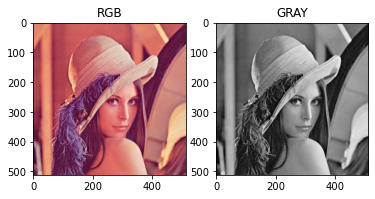

In [53]:
# show original image
plt.subplot(121)
plt.imshow(img_rgb)
plt.title('RGB')
# plt.set_cmap('gray')

# show original image
plt.subplot(122)
plt.imshow(gray)
plt.title('GRAY')
# plt.set_cmap('gray')
plt.show()